In [1]:
#Mounting to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!pip install GitPython
!pip install --force https://github.com/chengs/tqdm/archive/colab.zip

In [8]:
import git
import subprocess
import shutil
import os
import sys

class Retinanet:

  def __init__(self,working_dir=None):
    self.cwd=working_dir if working_dir != None else "/content"
  
  @staticmethod
  def import_model(cwd):

    #url="https://github.com/roboflow-ai/Monk_Object_Detection"
    url="https://github.com/karen-gishyan/Computer-vision-and-Drones-Thesis"
    repo_name=os.path.basename(url)
    path=os.path.join(cwd,repo_name) 
    print(path)
    
    if  not os.path.exists(path):
      git.Git(cwd).clone(url)
    
    else:    
      user_input=input("Non_Empty directory, replace? press y for Yes, n for No:")
      if user_input=="y":
        shutil.rmtree(path)
        git.Git(cwd).clone(url)
 
    os.chdir("/content/Computer-vision-and-Drones-Thesis/models/Modified Monk Retinanet/installation")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-r", "requirements.txt"])
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-r", "requirements_colab.txt"])
    os.chdir("/content")
    print("Requrements installed.")
  
  
cwd="/content/"
Retinanet().import_model(cwd)

/content/Computer-vision-and-Drones-Thesis
Non_Empty directory, replace? press y for Yes, n for No:y
Requrements installed.


In [ ]:
#! cd Monk_Object_Detection/3_mxrcnn/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install

In [5]:
import os
import shutil


if not os.path.exists("/content/Root_Dir"): os.makedirs("/content/Root_Dir")

if not os.path.exists("/content/Coco_style") :os.makedirs("/content/Coco_style")
if not os.path.exists("/content/Coco_style/images") :os.makedirs("/content/Coco_style/images")
if not os.path.exists("/content/Coco_style/annotations") :os.makedirs("/content/Coco_style/annotations")

shutil.move("/content/Coco_style","/content/Root_Dir")

'/content/Root_Dir/Coco_style'

In [6]:
import shutil
os.chdir("/content/drive/My Drive/Bath thesis/") # takes some time.

train_img_path="Final-Data/Augmentation1/Augmentation 1/train_images"
train_annot_path="Final-Data/Augmentation1/Augmentation 1/train_annotations_json/instances_Train.json"
valid_img_path="Final-Data/1000 images without augmentation/valid_images"
valid_annot_path="Final-Data/1000 images without augmentation/instances_Val.json"
classes_path="Final-Data/1000 images without augmentation/classes alphabetical.txt"

def copy_to_root(train_img_path=train_img_path,valid_img_ath=valid_img_path,train_annot_path=train_annot_path,valid_annot_path=valid_annot_path,classes_path=classes_path):
  shutil.copytree(train_img_path,"/content/Root_Dir/Coco_style/images/Train")
  shutil.copytree(valid_img_path,"/content/Root_Dir/Coco_style/images/Val")
  shutil.copy(train_annot_path,"/content/Root_Dir/Coco_style/annotations")
  shutil.copy(valid_annot_path,"/content/Root_Dir/Coco_style/annotations")
  shutil.copy(classes_path,"/content/Root_Dir/Coco_style/annotations")
  os.rename("/content/Root_Dir/Coco_style/annotations/classes alphabetical.txt","/content/Root_Dir/Coco_style/annotations/classes.txt")

copy_to_root()

In [9]:
train_num_img=sum([1 for i in os.listdir("/content/Root_Dir/Coco_style/images/Train")])
valid_num_img=sum([1 for i in os.listdir("/content/Root_Dir/Coco_style/images/Val")])
print("There are {} train images and {} valid images.".format(train_num_img,valid_num_img))

There are 1400 train images and 200 valid images.


In [ ]:
#!pip install efficientnet_pytorch
#!pip install tensorboardx

#https://github.com/Tessellate-Imaging/Monk_Object_Detection/blob/master/example_notebooks/5_pytorch_retinanet/Train%20Resnet18%20-%20With%20validation%20Dataset.ipynb

import os
os.chdir("/content/Computer-vision-and-Drones-Thesis/models/Modified Monk Retinanet/lib")
from train_detector import Detector
model = Detector();

os.chdir("/content/")

troot_dir = "Root_Dir";
tcoco_dir = "Coco_style";
timg_dir = "images";
tset_dir = "Train";



vroot_dir = "Root_Dir";
vcoco_dir = "Coco_style";
vimg_dir = "images";
vset_dir = "Val";

model.Train_Dataset(troot_dir, tcoco_dir, timg_dir, tset_dir, batch_size=8, image_size=352, use_gpu=True)
model.Val_Dataset(vroot_dir, vcoco_dir, vimg_dir, vset_dir)

model.Model(model_name="resnet34"); # resnet 50 brought cuda memory error.
model.Set_Hyperparams(lr=0.0001, val_interval=1, print_interval=20)
model.Train(num_epochs=300,output_model_name="karen_model.pt");

loading annotations into memory...
Done (t=0.43s)
creating index...
index created!
Num training images: 1400
loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Num validation images: 200
Epoch: 0 | Iteration: 0 | Classification loss: 1.12992 | Regression loss: 1.04172 | Running loss: 2.17164
Epoch: 0 | Iteration: 20 | Classification loss: 0.51668 | Regression loss: 0.97664 | Running loss: 2.33786
Epoch: 0 | Iteration: 40 | Classification loss: 0.67600 | Regression loss: 0.94647 | Running loss: 2.01151
Epoch: 0 | Iteration: 60 | Classification loss: 0.68753 | Regression loss: 0.70086 | Running loss: 1.84030
Epoch: 0 | Iteration: 80 | Classification loss: 0.59201 | Regression loss: 0.73456 | Running loss: 1.83247
Epoch: 0 | Iteration: 100 | Classification loss: 0.42148 | Regression loss: 0.69502 | Running loss: 1.76187
Epoch: 0 | Iteration: 120 | Classification loss: 0.45335 | Regression loss: 0.64389 | Running loss: 1.71125
Epoch: 0 | Iteration: 140 | Cla

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type DataParallel. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type ResNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Conv2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type BatchNorm2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python

Epoch: 1 | Iteration: 0 | Classification loss: 0.35767 | Regression loss: 0.55765 | Running loss: 1.56780
Epoch: 1 | Iteration: 20 | Classification loss: 0.61114 | Regression loss: 0.83700 | Running loss: 1.51518
Epoch: 1 | Iteration: 40 | Classification loss: 0.49187 | Regression loss: 0.51635 | Running loss: 1.47884
Epoch: 1 | Iteration: 60 | Classification loss: 1.30726 | Regression loss: 0.43371 | Running loss: 1.46341
Epoch: 1 | Iteration: 80 | Classification loss: 0.39724 | Regression loss: 0.56025 | Running loss: 1.43109
Epoch: 1 | Iteration: 100 | Classification loss: 0.36332 | Regression loss: 0.46446 | Running loss: 1.41165
Epoch: 1 | Iteration: 120 | Classification loss: 0.33919 | Regression loss: 0.59236 | Running loss: 1.38293
Epoch: 1 | Iteration: 140 | Classification loss: 0.48693 | Regression loss: 0.60348 | Running loss: 1.36474
Epoch: 1 | Iteration: 160 | Classification loss: 0.49196 | Regression loss: 0.80024 | Running loss: 1.33980
Evaluating dataset
Loading and pre

In [ ]:
from infer_detector import Infer
gtf = Infer();
gtf.Model(model_path="/content/karen_model.pt");


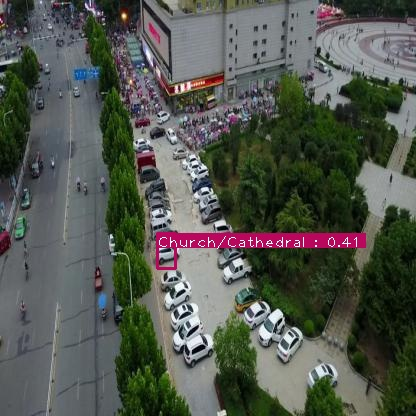

In [ ]:
#predictions are quite bad at the moment.
class_list=[]
with open("/content/Root_Dir/Coco_style/annotations/classes.txt") as file:
  for line in file:
    class_list.append(line.rstrip("\n"))
class_list=class_list[:-1]
img_p="/content/Images_and_Labels/Images/0000002_00005_d_0000014_jpg.rf.555bf2106d899e56d45da0a48295f04c.jpg"
scores, labels, boxes = gtf.Predict(img_p, class_list, vis_threshold=0.4);
from IPython.display import Image
Image(filename='output.jpg')